机器视觉图像的目标与背景的分割与提取主要要求：对输入图像可以达到目标和背景的分割

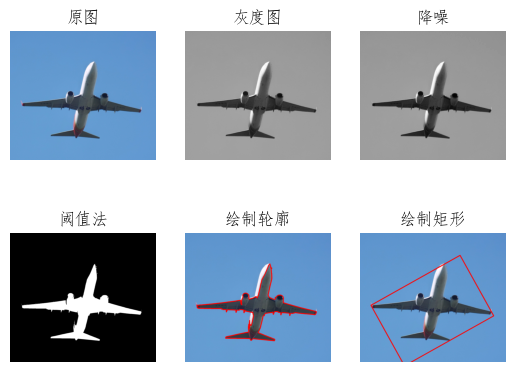

(675.0, 729.0)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("plane.jpg")
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 降噪
imageGaussian = cv2.GaussianBlur(imageGray, (3,3) , 3,3)

# 使用阈值法进行图像分割
ret, imageThresh = cv2.threshold(imageGaussian, 150, 255, cv2.THRESH_BINARY_INV)

# 寻找最大轮廓
# 寻找轮廓
contours, hierarchy = cv2.findContours(imageThresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
index = -1
maxArea = -1
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    if area > maxArea:
        maxArea = area
        index = i

rect = cv2.minAreaRect(contours[index])
point = cv2.boxPoints(rect)
point = np.intp(point)

imageContour = imageRGB.copy()
cv2.drawContours(imageContour, contours[index], -1, (255, 0, 0), 7)

imageRect = imageRGB.copy()
cv2.drawContours(imageRect, [point], -1, (255, 0, 0), 7)


plt.rcParams["font.sans-serif"] = ['FangSong']
plt.subplot(231), plt.title("原图"), plt.axis('off')
plt.imshow(imageRGB)
plt.subplot(232), plt.title("灰度图"), plt.axis('off')
plt.imshow(imageGray, cmap='gray')
plt.subplot(233), plt.title("降噪"), plt.axis('off')
plt.imshow(imageGaussian, cmap='gray')
plt.subplot(234), plt.title("阈值法"), plt.axis('off')
plt.imshow(imageThresh, cmap='gray')
plt.subplot(235), plt.title("绘制轮廓"), plt.axis('off')
plt.imshow(imageContour)
plt.subplot(236), plt.title("绘制矩形"), plt.axis('off')
plt.imshow(imageRect)
plt.show()
center = ((point[0][0] + point[2][0])/2, (point[0][1] + point[2][1])/2)
print(center)

基于Sobel算子完成对图像的搜索

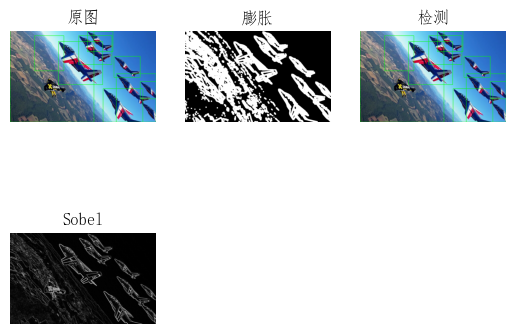

In [2]:
import cv2

# 读取图像
image = cv2.imread('14.jpg')
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 灰度化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Sobel算子进行边缘检测
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# 二值化
_, binary = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(binary, kernel, iterations=2)

# 轮廓检测
contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 过滤掉面积较小的轮廓
min_area = 5000 
min_width = 100  
min_height = 50  
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# 绘制轮廓
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    # 如果长宽都大于指定值，则绘制矩形
    if w > min_width and h > min_height:
        cv2.rectangle(imageRGB, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 显示结果
plt.rcParams["font.sans-serif"] = ['FangSong']
plt.subplot(231), plt.title("原图"), plt.axis('off')
plt.imshow(imageRGB)
plt.subplot(232), plt.title("灰度图"), plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.subplot(232), plt.title("膨胀"), plt.axis('off')
plt.imshow(dilated, cmap='gray')
plt.subplot(233), plt.title("检测"), plt.axis('off')
plt.imshow(imageRGB)
plt.subplot(234), plt.title("Sobel"), plt.axis('off')
plt.imshow(sobel, cmap='gray')
plt.show()

硬币检测及计数

[array([2600, 1830,  396], dtype=uint32), array([1508, 1762,  316], dtype=uint32), array([2002, 2580,  317], dtype=uint32)]
Num: 16


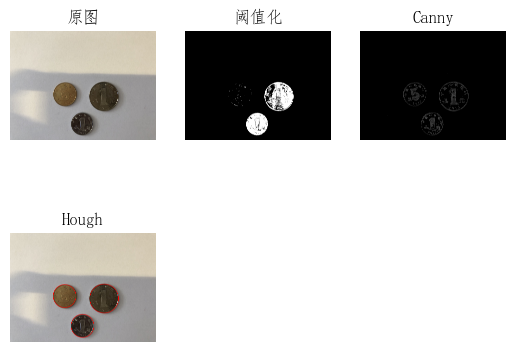

In [3]:
import cv2
import numpy as np

image = cv2.imread("15.jpg")
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 进行阈值化
ret, imageThreshold = cv2.threshold(imageGray, 50, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
imageDilate = cv2.dilate(imageThreshold, kernel)

# 进行高斯降噪
imageGaussian = cv2.GaussianBlur(imageGray, (5, 5), 0)
imageEdges = cv2.Canny(imageGaussian, 30, 50)

# 霍夫变换
circles = cv2.HoughCircles(imageGaussian, cv2.HOUGH_GRADIENT, 1, 200, param1=30, param2=90, minRadius=200, maxRadius=400)
circles = np.uint32(np.round(circles))

imageHough = imageRGB.copy()
circleCoin = []
for circle in circles[0, :]:
    cv2.circle(imageHough, (circle[0], circle[1]), circle[2], (255, 0, 0), 12)
    circleCoin.append(circle)
print(circleCoin)
# 半径阈值
radium = 350
Num = 10000
tenCoin = []
oneCoin = []
fiveCoin = []
for coin in circleCoin:
    if coin[2] > radium:
        tenCoin.append(coin)
        continue
    roi = image[coin[0]-coin[2]:coin[0]+coin[2], coin[1]-coin[2]:coin[1]+coin[2]]
    roiGray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    ret, roiThreshold = cv2.threshold(roiGray, 50, 255, cv2.THRESH_BINARY_INV)
#     cv2.imshow("th",roiThreshold)
#     cv2.waitKey(0)
    roiSum = np.sum(roiThreshold > 10)
    if roiSum > Num:
        oneCoin.append(coin)
    else:
        fiveCoin.append(coin)

print("Num: {}".format(len(tenCoin) * 10 + len(fiveCoin) * 5 + len(oneCoin) * 1))
    
plt.rcParams["font.sans-serif"] = ['FangSong']
plt.subplot(231), plt.title("原图"), plt.axis('off')
plt.imshow(imageRGB)
plt.subplot(232), plt.title("阈值化"), plt.axis('off')
plt.imshow(imageDilate, cmap='gray')
plt.subplot(233), plt.title("Canny"), plt.axis('off')
plt.imshow(imageEdges, cmap='gray')
plt.subplot(234), plt.title("Hough"), plt.axis('off')
plt.imshow(imageHough, cmap='gray')
plt.show()